In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [140]:
np.random.seed(4)

## 1. Visualization of data

In [131]:
# create ground truth function
X_truth = np.arange(0.06,10,0.01).reshape(994, 1)
y_truth = np.sin(X_truth) / X_truth**2 + X_truth * np.sin(X_truth)

In [141]:
# simulate sampling
X = np.random.rand(10, 1) * 10
X = np.sort(X)

In [142]:
y = np.sin(X) / X**2 + X * np.sin(X) + 2*np.random.randn(10, 1)

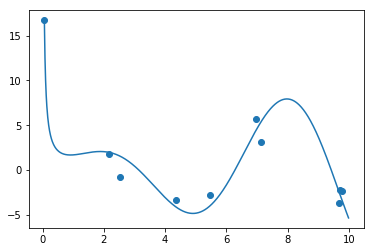

In [143]:
plt.scatter(X, y)
plt.plot(X_truth, y_truth)

## 2. Linear Regression

### 2-1. Derivation

Let $d$-dimensional input be $\mathrm{X}\in\mathbb{R}^{d \times n}$ and observation $\mathbf{y}\in\mathbb{R}^{n}$.
Here, we denote $\mathrm{X}=\left(\mathbf{x}_{1}, \mathbf{x}_{2}, \ldots, \mathbf{x}_{n}\right)$, $\mathbf{x}_{i}$ representing $i$-th input data vector.  
We can use arbitrary multidimensional data; $\mathbf{x}_{i}$ can be set of (scalar-valued) signals observed at $d$ sensors, $d$ patterns of nonlinear transformation of a scalar value $\mathbf{x}_{i} = (\phi_{1}(x_i), \phi_{2}(x_i), \ldots, \phi_{d}(x_i))$, where $x_i$ is a scalar value and $\phi_{1}, \phi_{2}, \ldots, \phi_{d}$ are nonlinear functions, such as $\phi_{i}(x)=x^{i-1}$, or combination of them:

$$
    \mathbf{x}_{i} = (\phi_{1}(\tilde{\mathbf{x}}_{i}), \phi_{2}(\tilde{\mathbf{x}}_{i}), \ldots, \phi_{d}(\tilde{\mathbf{x}}_{i})),
$$

where $\tilde{\mathbf{x}}_{i}\in\mathbb{R}^{s}$ is an $s$-dimensional underlying data and $\phi_{1}, \phi_{2}, \ldots, \phi_{d}:\mathbb{R}^{s}\to\mathbb{R}^{d}$ are nonlinear functions.

Anyway, we do not need to think of generation process of each $\mathbf{x}_{i}$ here. We just assume $\mathbf{x}_{i}$ is real-valued and multi-dimensional (of cource we can set $d=1$).

In **Linear Regression**, we predict $y$ by linear function of $\mathbf{x}\in\mathbb{R}^{d}$ as 

$$\hat{y} = \mathbf{w}^{\mathsf{T}}\mathbf{x}+b,$$

where $\mathbf{w}\in\mathbb{R}^{d}$ and $b\in\mathbb{R}$ are coefficients of linear function.  
\*You may want to use nonlinear transformation, but remember: each $\mathbf{x}_{i}$ can be a result of nonlinear transformation, though it is invisible here.

Re-formulating $\mathbf{x}$ and $\mathbf{w}$ as $(d+1)$-dimensional vector and setting last dimension of $\mathbf{x}$ be 1
and last dimension of $\mathbf{w}$ be $b$, we get 

$$\hat{y}=\mathbf{w}^{\mathsf{T}}\mathbf{x}=\mathbf{x}^{\mathsf{T}}\mathbf{w}.\tag{1}$$

To express observation $\mathbf{y}$ using $\mathrm{X}$ better, we can interpret finding best $\mathbf{w}$ as optimization problem as:

$$
\begin{align}
    \hat{\mathbf{w}} &= \arg\min \|\mathbf{y}-\hat{\mathbf{y}}\|^2 \\
                     &:= \arg\min \|\mathbf{y}-\mathrm{X}^{\mathsf{T}}\mathbf{w}\|^2 \\
                     &= \arg\min (\mathbf{y}-\mathrm{X}^{\mathsf{T}}\mathbf{w})^{\mathsf{T}}
                                 (\mathbf{y}-\mathrm{X}^{\mathsf{T}}\mathbf{w}) \\
                     &= \arg\min \mathbf{w}^{\mathsf{T}}\mathrm{X}\mathrm{X}^{\mathsf{T}}\mathbf{w}
                                 -2\mathbf{w}^{\mathsf{T}}\mathrm{X}\mathbf{y} + \mathbf{y}^{\mathsf{T}}\mathbf{y}\tag{2}.
\end{align}
$$

Note that the shape of $\mathrm{X}$ is $(d+1) \times n$ and all components of $(d+1)$-th row of $\mathrm{X}$ are all one.

(2) is a simple quadratic function of $\mathbf{w}$, so we can minimize it by differentiating it and setting the differentiation zero:

$$
    \hat{\mathbf{w}} = (\mathrm{X}\mathrm{X}^{\top})^{-1}\mathrm{X}\mathbf{y}.
$$

After estimating $\hat{\mathbf{w}}$, we can predict output value of given input $\mathbf{x}$ using (1).

### 2-2. Implementation

In [17]:
class LinearRegressor():
    def __init__(self, biased=True):
        self.biased = biased
    
    def calc_XXT(self, X):
        return X@X.T
    
    def fit(self, X, y):
        dim, n_samp = X.shape
        assert y.shape == (n_samp, 1)
        if self.biased:
            X_ = np.concatenate((X, np.ones((1, n_samp))))
        else:
            X_ = X.copy()
        self.ndim = X_.shape[0]
        self.w = np.linalg.solve(self.calc_XXT(X_), X_@y)
        
    def predict(self, X):
        dim, n_samp = X.shape
        if self.biased:
            X_ = np.concatenate((X, np.ones((1, n_samp))))
        else:
            X_ = X.copy()
        assert self.ndim == X_.shape[0]
        return self.w.T @ X_

Setting LinearRegressor.biased=True, you can introduce constant term $b$. 

#### simple 1-dimensional (linear) regression

In [144]:
lr = LinearRegressor()

In [145]:
lr.fit(X.T, y)

In [146]:
y_pred = lr.predict(X_truth.reshape(1,994))

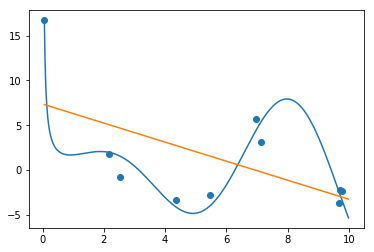

In [147]:
_=plt.scatter(X, y)
_=plt.plot(X_truth, y_truth)
_=plt.plot(X_truth, y_pred.T)

#### regression by 5- and 10-dimensional polynomials

Here we introduce nonlinear transformation $\phi_{i}(x)=x^{i}$.

In [153]:
X_5d = np.concatenate((X, X**2, X**3, X**4, X**5), axis=1)
X_10d = np.concatenate((X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10), axis=1)
X_truth_5d = np.concatenate((X_truth, X_truth**2, X_truth**3, X_truth**4, X_truth**5), axis=1)
X_truth_10d = np.concatenate((X_truth, X_truth**2, X_truth**3,
                             X_truth**4, X_truth**5, X_truth**6,
                             X_truth**7, X_truth**8, X_truth**9,
                             X_truth**10), axis=1)

In [154]:
lr_5 = LinearRegressor()
lr_10 = LinearRegressor()

In [155]:
lr_5.fit(X_5d.T, y)
lr_10.fit(X_10d.T, y)

In [156]:
y_pred_5 = lr_5.predict(X_truth_5d.T)
y_pred_10 = lr_10.predict(X_truth_10d.T)

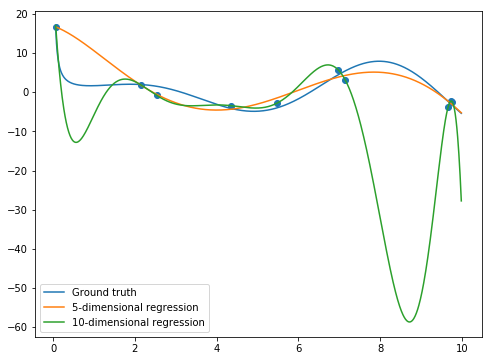

In [157]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y)
ax.plot(X_truth, y_truth, label="Ground truth")
ax.plot(X_truth, y_pred_5.T, label="5-dimensional regression")
ax.plot(X_truth, y_pred_10.T, label="10-dimensional regression")
_ = ax.legend()

You can see that 5-dimensional regression captures rough trend.
At the same time, though 10-dimensional regression fits ground truth curve at [2, 7], it is obviously overfitting.

In [166]:
print(lr_5.w)
print(lr_10.w)

[[-3.79379405e+00]
 [-3.74708133e+00]
 [ 1.31229898e+00]
 [-1.36073493e-01]
 [ 4.38804453e-03]
 [ 1.69463925e+01]]
[[-1.87713523e+02]
 [ 3.06295928e+02]
 [-2.14275304e+02]
 [ 7.39072608e+01]
 [-1.12035672e+01]
 [-3.20203514e-01]
 [ 3.88527118e-01]
 [-5.96081862e-02]
 [ 3.98774803e-03]
 [-1.02524760e-04]
 [ 2.72655298e+01]]


Coefficient for $x^5$ is larger in 10-dimensional model than in 5-dimensional model. This might be one cause of overfitting.

## 3. Ridge Regression

### 3-1. Derivation

For evade overfitting, we can introduce various penalty term for $\mathbf{w}$.
In Ridge regression, we introduce $L^2$ penalty as 

$$
\begin{align}
    \hat{\mathbf{w}} &= \arg\min \|\mathbf{y}-\hat{\mathbf{y}}\|^2 + \alpha\|\mathbf{w}\|^2\\
                     &= \arg\min \mathbf{w}^{\mathsf{T}}(\mathrm{X}\mathrm{X}^{\mathsf{T}}+\alpha\mathrm{I})\mathbf{w}
                                 -2\mathbf{w}^{\mathsf{T}}\mathrm{X}\mathbf{y} + \mathbf{y}^{\mathsf{T}}\mathbf{y}.\\
\end{align}
$$

Then, we can easily get optimum value of $\mathbf{w}$ in the same way:

$$\hat{\mathbf{w}} = (\mathrm{X}\mathrm{X}^{\mathsf{T}}+\alpha\mathrm{I})^{-1}\mathrm{X}\mathbf{y}.$$

### 3-2. Implementation

regression by 3- and 7-dimensional polynomials

In [159]:
class RidgeRegressor(LinearRegressor):
    def __init__(self, alpha=1e0, biased=True):
        super().__init__(biased)
        self.alpha=alpha
        
    def calc_XXT(self, X):
        return X@X.T + self.alpha * np.eye(self.ndim)

In [160]:
rr_10 = RidgeRegressor(alpha=5)

In [161]:
rr_10.fit(X_10d.T, y)

In [162]:
y_pred_10_ridge = rr_10.predict(X_truth_10d.T)

(-15, 20)

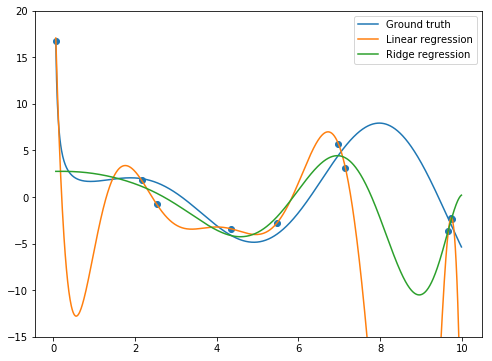

In [164]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y)
ax.plot(X_truth, y_truth, label="Ground truth")
ax.plot(X_truth, y_pred_10.T, label="Linear regression")
ax.plot(X_truth, y_pred_10_ridge.T, label="Ridge regression")
_ = ax.legend()
ax.set_ylim(-15, 20)

Overfitting seems be more moderate.

In [165]:
print(lr_10.w)
print(rr_10.w)

[[-1.87713523e+02]
 [ 3.06295928e+02]
 [-2.14275304e+02]
 [ 7.39072608e+01]
 [-1.12035672e+01]
 [-3.20203514e-01]
 [ 3.88527118e-01]
 [-5.96081862e-02]
 [ 3.98774803e-03]
 [-1.02524760e-04]
 [ 2.72655298e+01]]
[[ 7.96675395e-02]
 [-1.52846619e-01]
 [-1.90463247e-01]
 [-6.02504691e-02]
 [ 1.61104546e-01]
 [-9.53564428e-02]
 [ 2.64271400e-02]
 [-3.73117155e-03]
 [ 2.59308913e-04]
 [-7.04122349e-06]
 [ 2.74848208e+00]]


But actually, under noisy model $y_{\mathrm{obs}}=x_{\mathrm{truth}}+e; e\sim\mathcal{N}(0, \sigma^2)$, observation will be in the blue area below with some certainty.

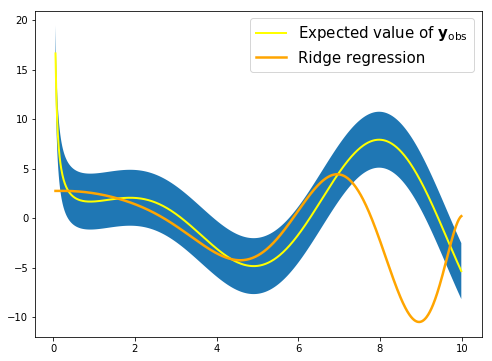

In [192]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X_truth, y_truth, c="yellow", linewidth=2, label=r"Expected value of $\mathbf{y}_{\mathrm{obs}}$")
ax.fill_between(X_truth[:, 0], y_truth[:, 0] + 2*np.sqrt(2), y_truth[:, 0] - 2*np.sqrt(2)) # 95 percent confidence interval 
ax.plot(X_truth, y_pred_10_ridge.T, c="orange", linewidth=2.5, label="Ridge regression")
ax.legend(fontsize=15)

At least we want to predict $y$ and obtain its degree of confidence: in above example, we want know predicted values in [7, 10] are more uncertain. How can we do it?

## 4. Bayesian Regression

### 4-1. Derivation

Linear regression and Ridge regression can be interpreted as maximum likelihood estimation under equi-variance Gaussian assumption:

$$
y|\mathbf{w},\mathbf{x} \sim \mathcal{N}(\mathbf{w}^{\mathsf{T}}\mathbf{x}, \sigma^2).\tag{3}
$$

This is because MLE of $\mathbf{w}$ under this assumption becomes as follows:

$$
\begin{align}
    \hat{\mathbf{w}}_{\mathrm{MLE}} &= \arg\max\sum_{i=1}^{n}\log p(y_i|\mathbf{x}_i, \mathbf{w})\\
                                    &= \arg\max_{\mathbf{w}}\sum_{i=1}^{n}\frac{-(y_i-\mathbf{w}^{\mathsf{T}}\mathbf{x}_i)^2}{2\sigma^2} + \mathrm{const.},
\end{align}
$$ 

where $\mathrm{const.}$ includes terms independent of $\mathbf{w}$, which is equivalent to former formulation.

We want do is not only to obtain a point estimator of $\mathbf{w}$ but also to estimate condence interval, and further, distribution of $\mathbf{w}$.

So, we introduce prior distribution for $\mathbf{w}$:

$$
    \mathbf{w} \sim \mathcal{N}(\mathbf{0}, \mathrm{\Sigma}),
$$

which is independent of $\mathrm{X}$. Incorporating this with eq. (3), we can calculate **posterior distribution of $\mathbf{w}$** under observation of $\mathbf{y}$:

$$
\begin{align}
    \log p(\mathbf{w}|\mathbf{y}, \mathrm{X}) &\propto \log p(\mathbf{w}) + \log p(\mathbf{y}|\mathbf{w},\mathrm{X})\\
                                         &=\log p(\mathbf{w}) + \sum_{i=1}^{n} \log p(y_i|\mathbf{w},\mathbf{x}_i)\\
                                         &=-\frac{1}{2}\mathbf{w}^{\mathsf{T}}\mathrm{\Sigma}^{-1}\mathbf{w}
                                           -\sum_{i=1}^{n} \frac{(y_i-\mathbf{w}^{\mathsf{T}}\mathbf{x}_i)^2}{2\sigma^2}\\
                                         &=-\frac{1}{2}\mathbf{w}^{\mathsf{T}}\mathrm{\Sigma}^{-1}\mathbf{w}
                                           -\frac{1}{2\sigma^2}\mathbf{w}^{\mathsf{T}}\left(\sum_{i=1}^{n}\mathbf{x}_i\mathbf{x}_i^{\mathsf{T}}\right)\mathbf{w}
                                           +\frac{1}{\sigma^2}\mathbf{w}^{\mathsf{T}}\left(\sum_{i=1}^{n}y_i\mathbf{x}_i\right)+\mathrm{const.}\\
                                         &=-\frac{1}{2\sigma^2}\left(\mathbf{w}-(\mathrm{X}\mathrm{X}^{\mathsf{T}}+\sigma^2\Sigma^{-1})^{-1}\mathrm{X}\mathbf{y}\right)^{\mathsf{T}}
                                           \left(\mathrm{X}\mathrm{X}^{\mathsf{T}}+\sigma^2\Sigma^{-1}\right)
                                           \left(\mathbf{w}-(\mathrm{X}\mathrm{X}^{\mathsf{T}}+\sigma^2\Sigma^{-1})^{-1}\mathrm{X}\mathbf{y}\right)+\mathrm{const.}.
\end{align}
$$

Therefore, now we know prior distribution of $\mathbf{w}$ is

$$
    \mathbf{w}|\mathbf{y}, \mathrm{X} \sim \mathcal{N}\left((\mathrm{X}\mathrm{X}^{\mathsf{T}}+\sigma^2\Sigma^{-1})^{-1}\mathrm{X}\mathbf{y}, \left(\Sigma^{-1}+\frac{1}{\sigma^2}\mathrm{X}\mathrm{X}^{\mathsf{T}}\right)^{-1}\right).
$$

Using this probability, we get distribution of predicted value $y^{\ast}=\mathbf{w}^{\mathsf{T}}\mathbf{x}^{\ast}$ at new input point $\mathbf{x}^{\ast}$:

$$
    y^{\ast}|\mathbf{x}^{\ast}, \mathbf{y}, \mathrm{X} \sim \mathcal{N}\left(\mathbf{y}^{\mathsf{T}}\mathrm{X}^{\mathsf{T}}(\mathrm{X}\mathrm{X}^{\mathsf{T}}+\sigma^2\Sigma^{-1})^{-1}\mathbf{x}^{\ast},
                                                            (\mathbf{x}^{\ast})^{\mathsf{T}}\left(\Sigma^{-1}+\frac{1}{\sigma^2}\mathrm{X}\mathrm{X}^{\mathsf{T}}\right)^{-1}\mathbf{x}^{\ast}\right)
$$

Our goal is achieved: 95 % confidence interval of $y^{\ast}$ is

$$
\begin{align}
  &\left(m_{\mathbf{w}}-2\sigma_{\mathbf{w}}, m_{\mathbf{w}}+2\sigma_{\mathbf{w}}\right);\\
  & m_{\mathbf{w}} = \mathbf{y}^{\mathsf{T}}\mathrm{X}^{\mathsf{T}}(\mathrm{X}\mathrm{X}^{\mathsf{T}}+\sigma^2\Sigma^{-1})^{-1}\mathbf{x}^{\ast},\\
  & \sigma_{\mathbf{w}} = (\mathbf{x}^{\ast})^{\mathsf{T}}\left(\Sigma^{-1}+\frac{1}{\sigma^2}\mathrm{X}\mathrm{X}^{\mathsf{T}}\right)^{-1}\mathbf{x}^{\ast}.
\end{align}
$$

Now, let's go formula deformation so that we can generalize it to **kernel regression**.

**-- future topics --**
* Bayesian kernel regression
* Gaussian process regression